In [2]:
import numpy as np
import matplotlib.pyplot as plt

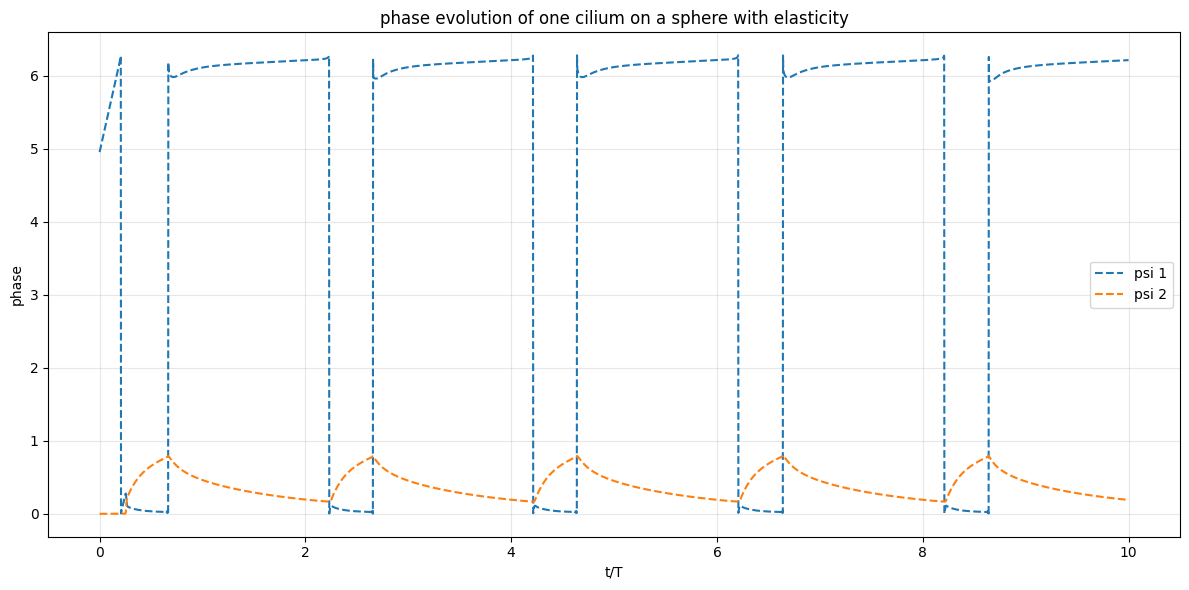

In [4]:
path_1_c = '../data/plane_old_elasticity_test_fils_1_zval0.75/20250520/ciliate_1fil_9000blob_8.00R_0.0001torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat'

data = np.loadtxt(path_1_c)
time = data[:, 0] / 500.0
psi1 = np.mod(data[:, 2], 2*np.pi)
psi2 = data[:, 3]

# Create a single figure with both plots
plt.figure(figsize=(12, 6))
plt.plot(time, psi1, label='psi 1', linestyle='--')
plt.plot(time, psi2, label='psi 2', linestyle='--')

plt.xlabel('t/T')
plt.ylabel('phase')
plt.title('phase evolution of one cilium on a sphere with elasticity')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()